구현이란, <b>머리속의 알고리즘</b>을 소스코드로 바꾸는 과정이다.<br>
특히 알고리즘에서의 구현이란 "풀이를 생각하는건 쉽지만, 코드로 바꾸기 어려운 문제"를 의미한다.<br>
예를들어 N개의 원소가 있는 리스트에서 R개를 뽑아 순열을 구할 경우, 무작정 다 작성 할 수 있지만 itertools를 이용하면 편한것등이 구현의 기능<br><br>
이 책에서는 <b>완전 탐색</b>과 <b>시뮬레이션</b>을 구현으로 다룬다<br>
완전탐색은 "모든 경우의 수를 다 계산하는 해결방법"이고,<br>
시뮬레이션은 "문제에서 제시한 알고리즘을 한 단계식 차례대로 직접 수행해야하는 유형"이다.<br>


### 상하좌우 예제

- 여행자 A는 N X N크기의 정사각형 공간 위에 있다.
- 가장 왼쪽 위의 좌표는 (1,1)이며, 오른쪽 아래의 좌표는 (N,N)이다.
- 여행자가 어디를 가고자 한다. 이동하는 방법은 L(left),R(right),U(up),D(down)의 4가지로 분류하며 한칸씩 이동한다.
- 지도 바깥으로는 나갈 수 없다.

여행자의 최종 목적지가 어디인지 좌표를 출력하는 프로그램을 작성하라

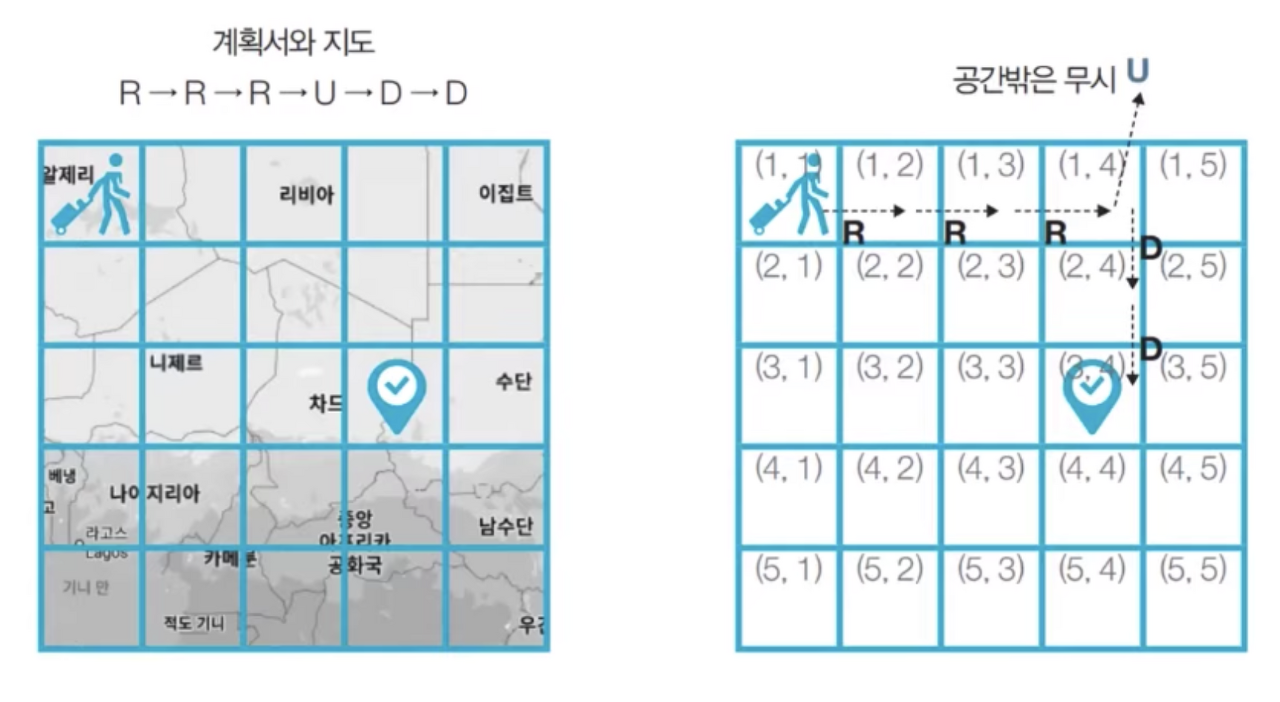

입력조건 :<br>
- 첫째 줄에 공간의 크기를 나타내는 N이 주어진다(1$\leq$ N $\leq$ 100)
- 둘째 줄게 여행가 A가 이동할 계획서 내용이 주어진다(1$\leq$ 이동횟수 $\leq$ 100)

출력조건 :
- 첫째 줄에 여행가 A가 최종적으로 도착할 지점의 좌표(X,Y)를 공백으로 구분하여 출력한다


입력예시 :<br>
5<br>
R R R U D D<br><br>
출력예시 :
3 4

In [3]:
#예제 4-1
#N입력 받기
n = int(input())
x,y = 1,1
plans = input().split()

#L,R,U,D에 따른 이동 방향
dx = [0,0,-1,1]
dy = [-1,1,0,0]
move_types = ['L','R','U','D']

#이동 계획을 하나씩 살펴보자
for plan in plans:
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
            
    #공간을 벗어날 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    #이동 수행
    x,y = nx,ny
    
print(x,y)

5
R R R U D D
3 4


### 예제 4-2 ; 시각

정수 N이 입력되면 00시00분00초부터 N시59분59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램을 작성.<br>
입력이 1이면, 00시00분03초, 00시13분30초 등의 시각은 세어야함.<br>

입력조건:
- 첫째 줄에 정수 N이 입력된다.(0 $\leq$ N $\leq$ 23)
출력조건:
- 00시00분00초부터 N시59분59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 출력한다.

입력예시:<br>
5<br>
출력예시:<br>
11475

In [4]:
hour = int(input())

count = 0
for i in range(hour+1):
    for j in range(60):
        for k in range(60):
            if '3' in str(i) + str(j) + str(k):
                count += 1
                
print(count)

5
11475


### <2> 왕실의 나이트

왕실 정원은 8 X 8의 좌표평면으로 이루어져있다. 나이트는 L자 형태로만 이동 가능하며 정원밖으로 나갈 수 없다.<br>
나이트는 두가지 경우로 이동 가능하다
- 수평으로 두 칸 이동 후 수직으로 한 칸 이동
- 수직으로 두 칸 이동 후 수평으로 한 칸 이동

이때, 나이트가 어떤 위치에 있을 때, 이동 할 수 있는 경우의 수를 출력하는 프로그램을 작성하시오<br>
- 행은 1\~8까지의 숫자로, 열은 a\~h까지의 알파벳으로 표현한다.

예를들어, 입력이 a1이라면, 출력은 2이다.

In [11]:
#현재 위치
input_data =input()      #인풋을 받아
row = int(input_data[1]) #행은 인풋의 첫번째 값이야
col = int(ord(input_data[0])) - int(ord('a')) + 1  #열은 뭐지...??

#나이트의 방향 정의
moves = [(-2,-1),(-2,1),(2,1),(2,-1),(1,2),(1,-2),(-1,2),(-1,-2)]

#이동 가능한지 확인
result = 0
for move in moves:
    #이동하고자 하는 위치
    next_row = row + move[0]
    next_col = col + move[1]
    
    #이동할 수 있으면 횟수 세주기
    if next_row >= 1 and next_row <= 8 and next_col >= 1 and next_col <= 8:
        result += 1
        
print(result)

a1
2


## <3>게임 개발

게임에서 움직이는 캐릭터를 개발중.<br>
N X M 크기의 직사각형에 있으며, 각 칸은 육지 혹은 바다. 바다로는 이동 할 수 없음<br>
캐릭터는 동서남북중 한곳을 바라봄.<br>
맵의 칸은 왼쪽 위를 기준으로 떨어진 칸 수만큼 나타냄. (A,B) 
- A : 북쪽에서 떨어진 칸의 개수
- B : 서쪽에서 떨어진 칸의 개수

